# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import os
from unityagents import UnityEnvironment
import numpy as np
import torch
from torchsummary import summary
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name=os.path.normpath("./one_agent/Reacher_Linux_NoVis/Reacher.x86_64"))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print('States is of type: ', type(states))
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
States is of type:  <class 'numpy.ndarray'>
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# step = 0
# while True:
#     step += 1
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     print('\rStep: {}\tAveraged score: {:.2f}'.format(step, np.mean(scores)), end="")
#     dones = env_info.local_done                        # see if episode finished
#     states = next_states                               # roll over states to next time step
#     scores += env_info.rewards                         # update the score (for each agent)
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('\nTotal score (averaged over agents) this episode: {:.2f}'.format(np.mean(scores)))

When finished, you can close the environment.

```python
env.close()
```

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### 4.1 Define the training function and run

In [6]:
def train_ddpg(env, agent, save_model_actor, save_model_critic, n_episodes=2000):
    """Deep Deterministic Policy Gradients (DDPG)
    
    Params
    ======
        env: environment
        agent: DDPG agent
        save_model_actor: actor model filename for saving
        save_model_critic: critic model filename for saving
        n_episodes (int): maximum number of training episodes
    """
    scores_deque = deque(maxlen=100)
    scores_all = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        step = 0
        while True:
            step += 1
            actions = agent.act(states, add_noise=True)
            # actions = np.clip(actions, -1, 1)  # has done by agent.act
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        scores_deque.append(scores)
        scores_all.append(scores)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(scores)), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), save_model_actor)
            torch.save(agent.critic_local.state_dict(), save_model_critic)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores_all

In [7]:
from ddpg_agent import Agent

agent_ddpg = Agent(num_agents, state_size, action_size, random_seed=0)

# print the network summary
print('Actor network:')
summary(agent_ddpg.actor_local, (state_size,))
print('\nCritic network:')
summary(agent_ddpg.critic_local, [(state_size,), (action_size,)])

scores_ddpg = train_ddpg(env, agent_ddpg, 'model_actor_ddpg.pt', 'model_critic_ddpg.pt')

Actor network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          17,408
            Linear-2                  [-1, 256]         131,328
            Linear-3                    [-1, 4]           1,028
Total params: 149,764
Trainable params: 149,764
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.57
Estimated Total Size (MB): 0.58
----------------------------------------------------------------

Critic network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          17,408
            Linear-2                  [-1, 256]         132,352
            Linear-3                    [-1, 1]             257
Total par

#### 4.2. Plot the training score curve

In [8]:
## running mean function
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / N

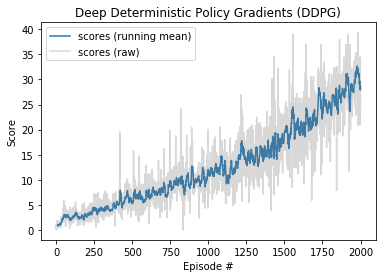

In [9]:
scores_ddpg_running_mean = running_mean(scores_ddpg, 10)
plt.figure()
plt.plot(np.arange(1, len(scores_ddpg)+1)[-len(scores_ddpg_running_mean):], scores_ddpg_running_mean,
         label='scores (running mean)')
plt.plot(np.arange(1, len(scores_ddpg)+1), scores_ddpg,
         color='grey', alpha=0.3, label='scores (raw)')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Deep Deterministic Policy Gradients (DDPG)')
plt.show()

### Close the environment

In [10]:
env.close()